In [698]:
import warnings
warnings.filterwarnings('ignore')
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

## Data reading

- reading the CSV

In [700]:
df = pd.read_csv('malicious_phish.csv')
print('Shape of DataFrame:', df.shape)
print('Size of DataFrame:', df.size)

Shape of DataFrame: (651191, 2)
Size of DataFrame: 1302382


- checking first five rows

In [701]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


- checking last five rows

In [702]:
df.tail()


,url,type
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing
651190,www.angelfire.com/goth/devilmaycrytonite/,phishing


## concise summary of our dataset

In [703]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


## Describing the Data

In [704]:
df.describe(exclude='number').T

,count,unique,top,freq
url,651191,641119,http://style.org.hc360.com/css/detail/mysite/s...,180
type,651191,4,benign,428103


## Checking for null values

In [705]:
df.isna().sum()

url     0
type    0
dtype: int64

## Checking if there are duplicates

In [706]:
df.duplicated().sum()

10066

In [707]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(651191, 2)
(641125, 2)


## Data ploting

In [710]:
countTypes = df.type.value_counts()
countTypes

benign        428080
defacement     95308
phishing       94092
malware        23645
Name: type, dtype: int64

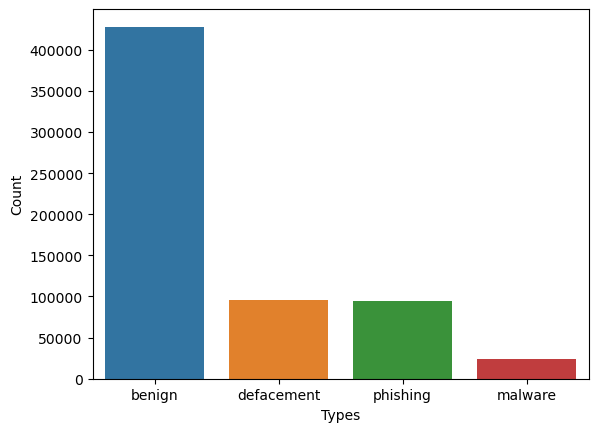

In [711]:
sns.barplot(x=countTypes.index, y=countTypes)
plt.xlabel('Types')
plt.ylabel('Count');

# Machine learning modeling

## Features Selection

In [632]:
df.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'price', 'likes',
       'photos', 'tips', 'rating', 'ratingSignals'],
      dtype='object')

We would choose price column as our target and for the features we would discard the two columns name and address as they don't contribute to our model